In [1]:
import tensorflow as tf
from sklearn import datasets
import numpy as np
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [2]:
wine=datasets.load_wine()
X=wine.data
Y=wine.target
print(X.shape,Y.shape)

(178, 13) (178,)


In [3]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
X = mm_scaler.fit_transform(X)
print(X)

[[0.84210526 0.1916996  0.57219251 ... 0.45528455 0.97069597 0.56134094]
 [0.57105263 0.2055336  0.4171123  ... 0.46341463 0.78021978 0.55064194]
 [0.56052632 0.3201581  0.70053476 ... 0.44715447 0.6959707  0.64693295]
 ...
 [0.58947368 0.69960474 0.48128342 ... 0.08943089 0.10622711 0.39728959]
 [0.56315789 0.36561265 0.54010695 ... 0.09756098 0.12820513 0.40085592]
 [0.81578947 0.66403162 0.73796791 ... 0.10569106 0.12087912 0.20114123]]


In [4]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,stratify=Y,random_state=4,test_size=0.20)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(142, 13) (36, 13) (142,) (36,)


In [5]:
Y_train=np.reshape(Y_train,(142,1))
Y_test=np.reshape(Y_test,(36,1))
print(Y_train.shape,Y_test.shape)

(142, 1) (36, 1)


In [6]:
model=tf.keras.Sequential([
    layers.Dense(50,activation='relu'),
    layers.Dense(100,activation='relu'),
    layers.Dense(50,activation='relu'),
    layers.Dense(3,activation='softmax')
])

In [9]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=['accuracy'])

In [10]:
history=model.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test))

Epoch 1/100
5/5 [==============================] - 0s 35ms/step - loss: 1.0004 - accuracy: 0.5775 - val_loss: 0.7248 - val_accuracy: 0.8333
Epoch 2/100
5/5 [==============================] - 0s 8ms/step - loss: 0.5697 - accuracy: 0.8592 - val_loss: 0.4192 - val_accuracy: 0.7778
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 0.3628 - accuracy: 0.8239 - val_loss: 0.1257 - val_accuracy: 0.9444
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 0.1646 - accuracy: 0.9437 - val_loss: 0.0644 - val_accuracy: 1.0000
Epoch 5/100
5/5 [==============================] - 0s 9ms/step - loss: 0.1174 - accuracy: 0.9648 - val_loss: 0.1579 - val_accuracy: 0.9167
Epoch 6/100
5/5 [==============================] - 0s 8ms/step - loss: 0.1176 - accuracy: 0.9648 - val_loss: 0.0427 - val_accuracy: 0.9722
Epoch 7/100
5/5 [==============================] - 0s 9ms/step - loss: 0.0794 - accuracy: 0.9718 - val_loss: 0.2067 - val_accuracy: 0.9167
Epoch 8/100
5/5 [=========

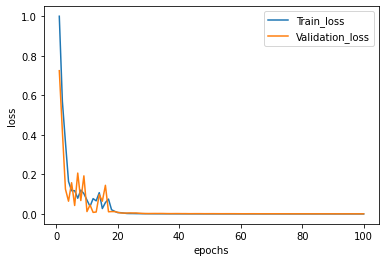

In [11]:
import matplotlib.pyplot as plt

epochs=len(history.history['loss'])
plt.plot([i for i in range(1,epochs+1)],history.history['loss'],label="Train_loss")
plt.plot([i for i in range(1,epochs+1)],history.history['val_loss'],label="Validation_loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

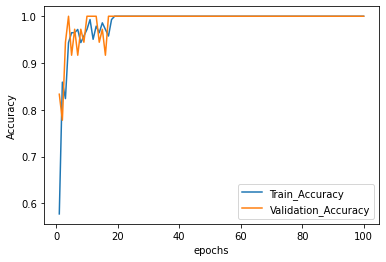

In [12]:
plt.plot([i for i in range(1,epochs+1)],history.history['accuracy'],label="Train_Accuracy")
plt.plot([i for i in range(1,epochs+1)],history.history['val_accuracy'],label="Validation_Accuracy")
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()